<a href="https://colab.research.google.com/github/Solafunmi/Ekiti/blob/master/Ecomm_Customer_Segmentation_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
data=pd.read_excel("ecom customer_data.xlsx")
data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
df.Gender.value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

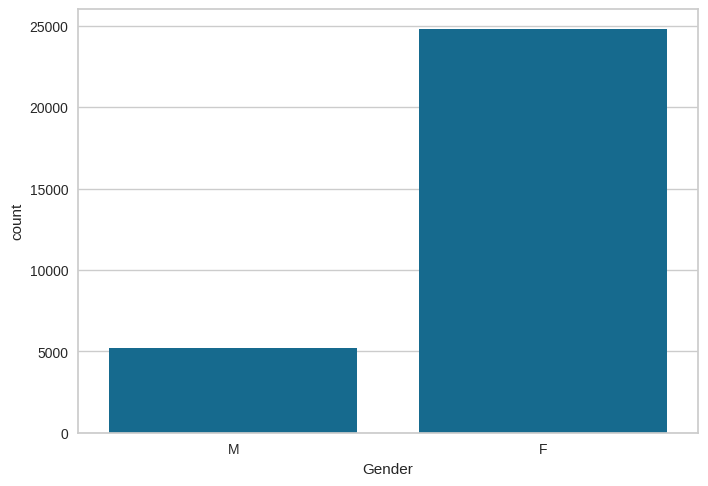

In [ ]:
sns.countplot(data=df,x='Gender')
plt.show()

<Axes: xlabel='Orders', ylabel='count'>

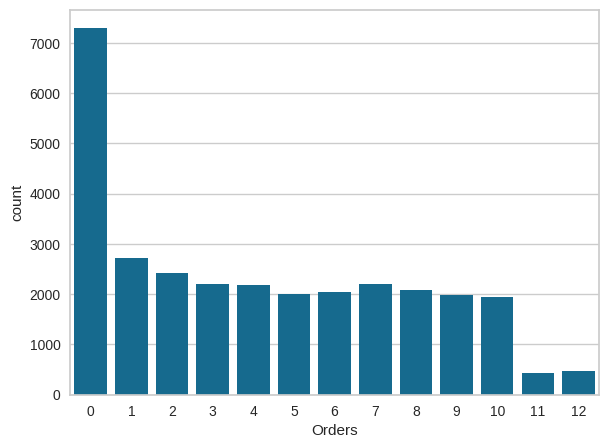

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Orders')

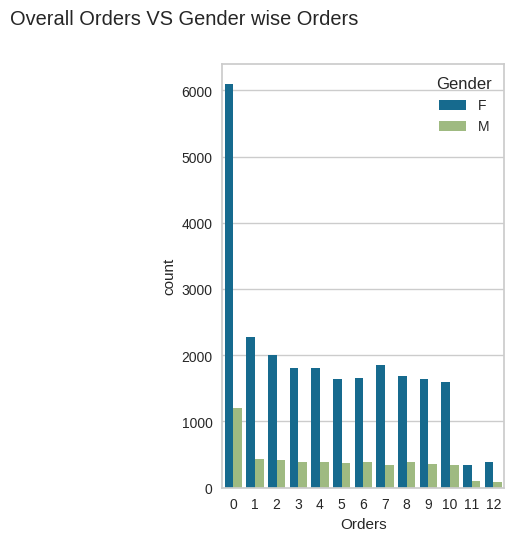

In [ ]:
plt.subplot(1,2,2)
sns.countplot(data=df,x='Orders',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()

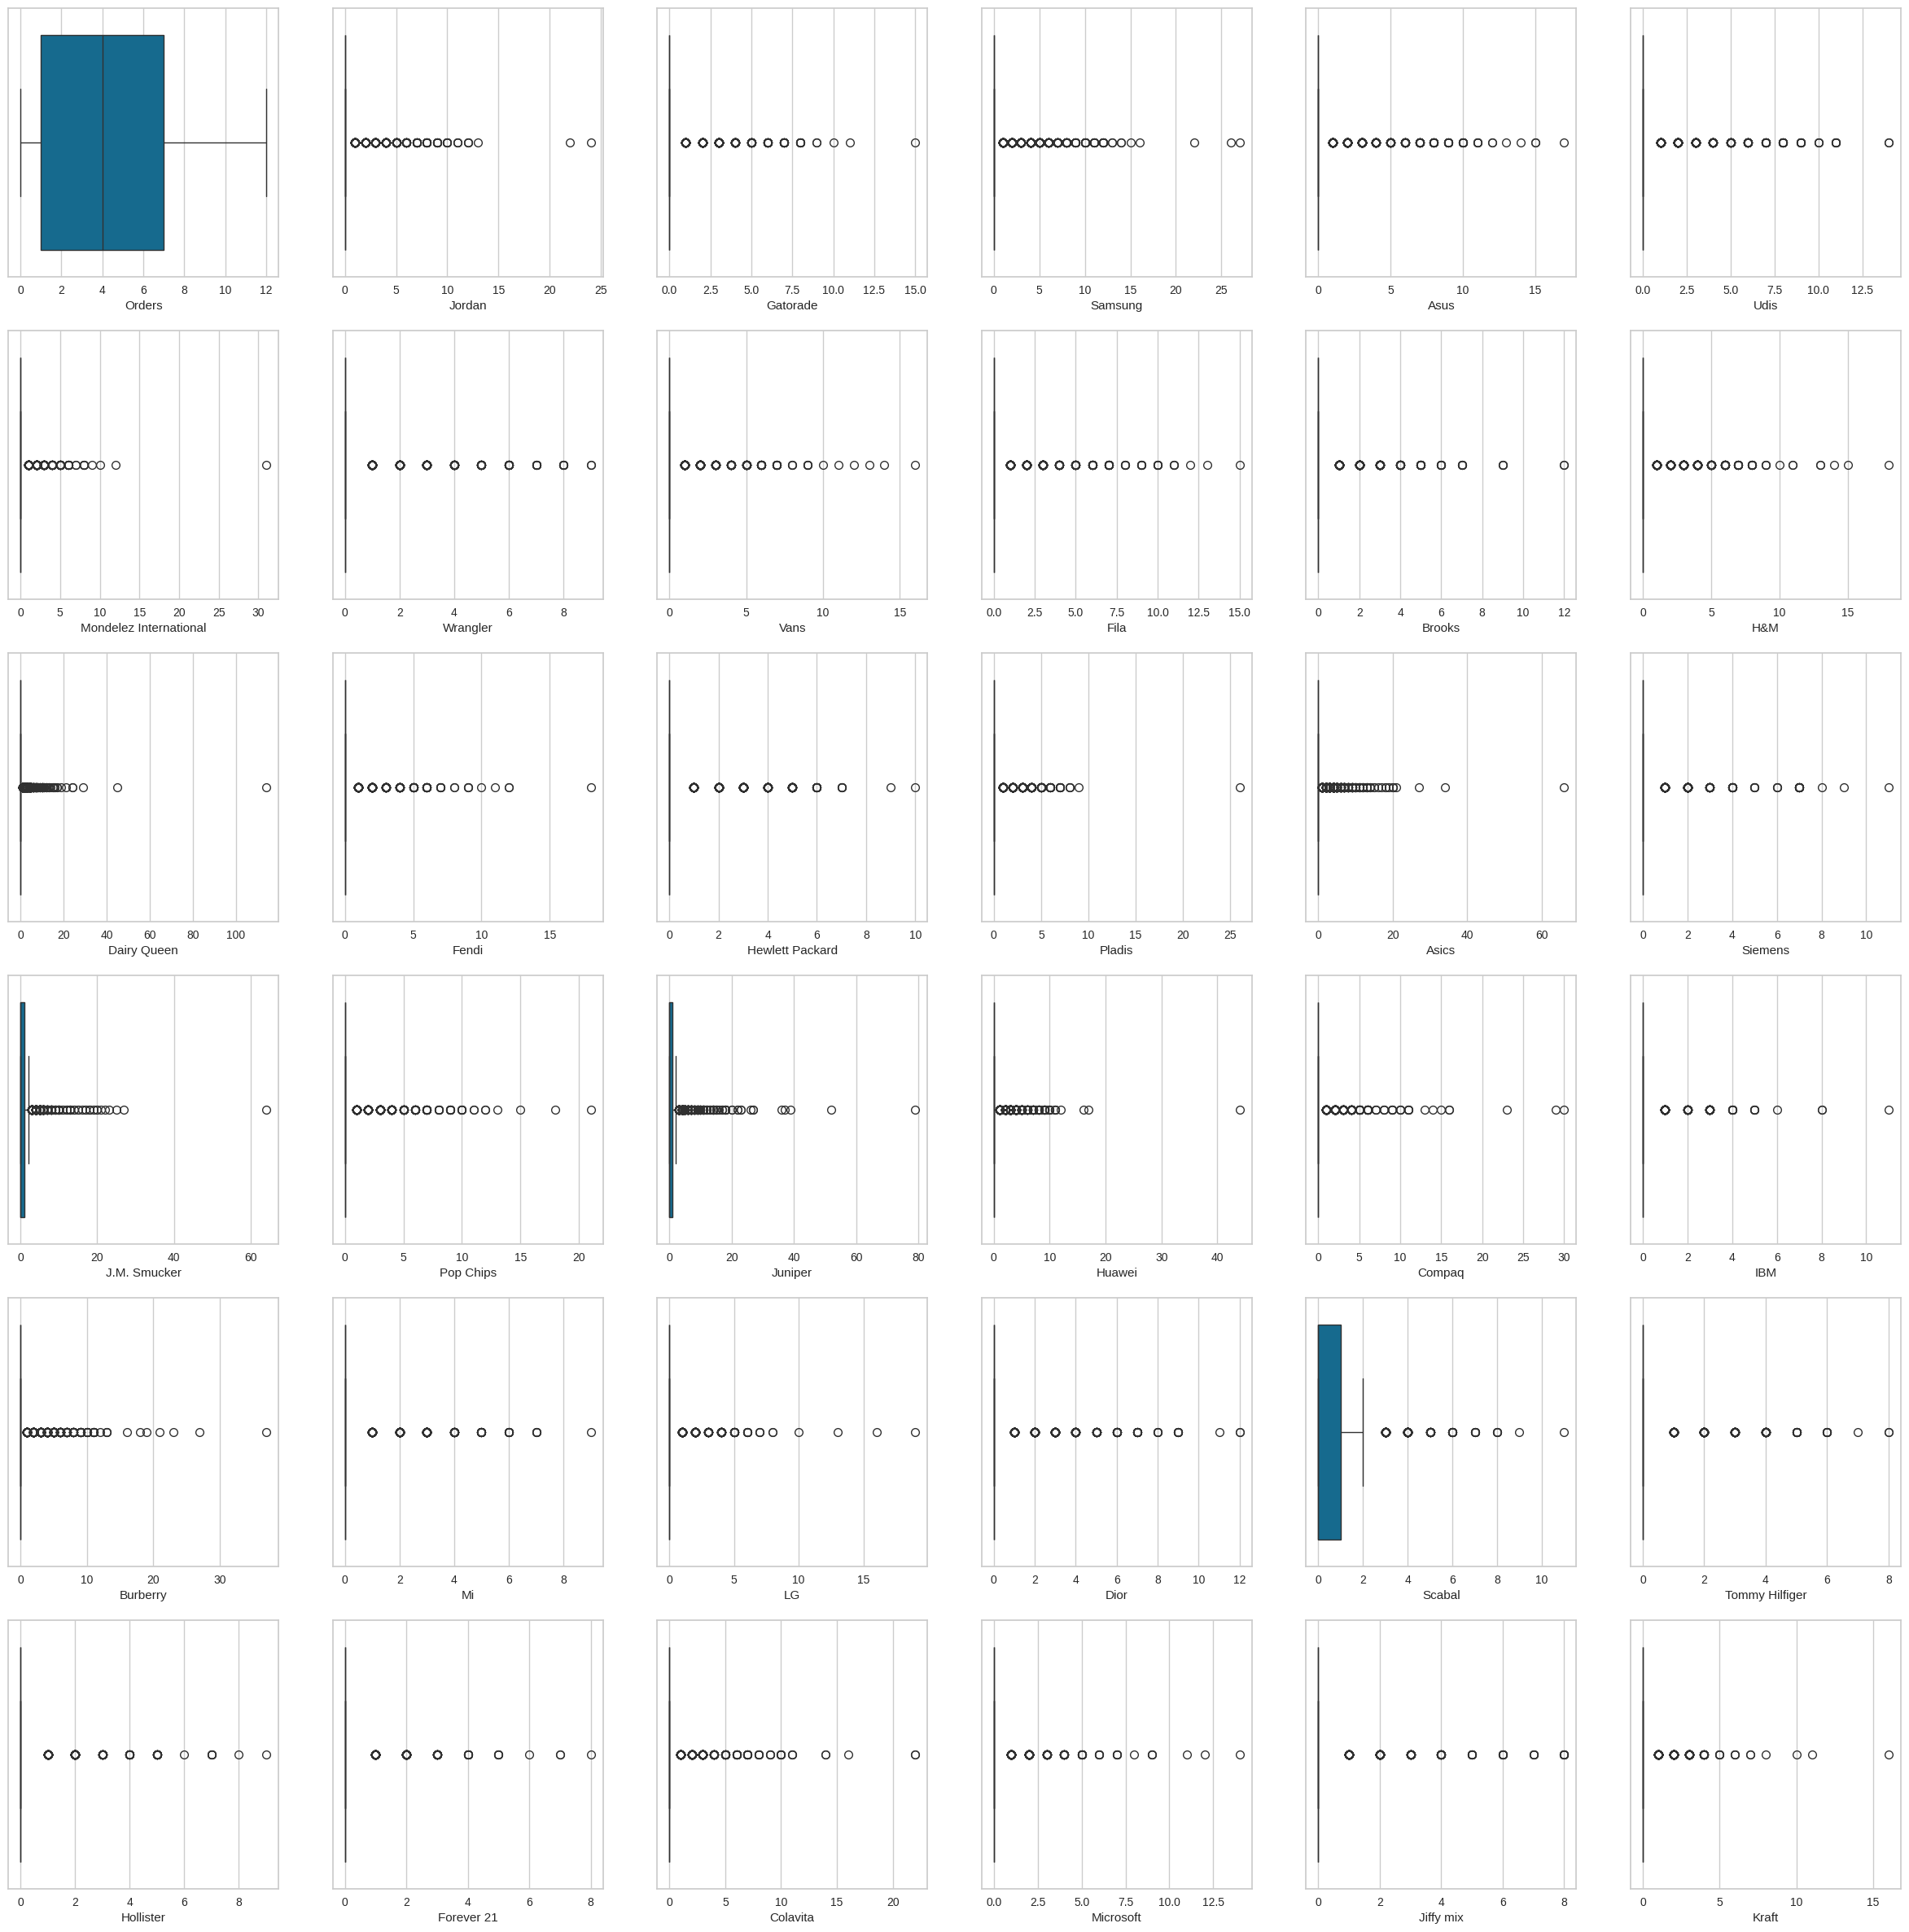

In [ ]:
#Orders and searches of each brands
cols=list(df.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=df,x=df[col])
dist_list(cols)

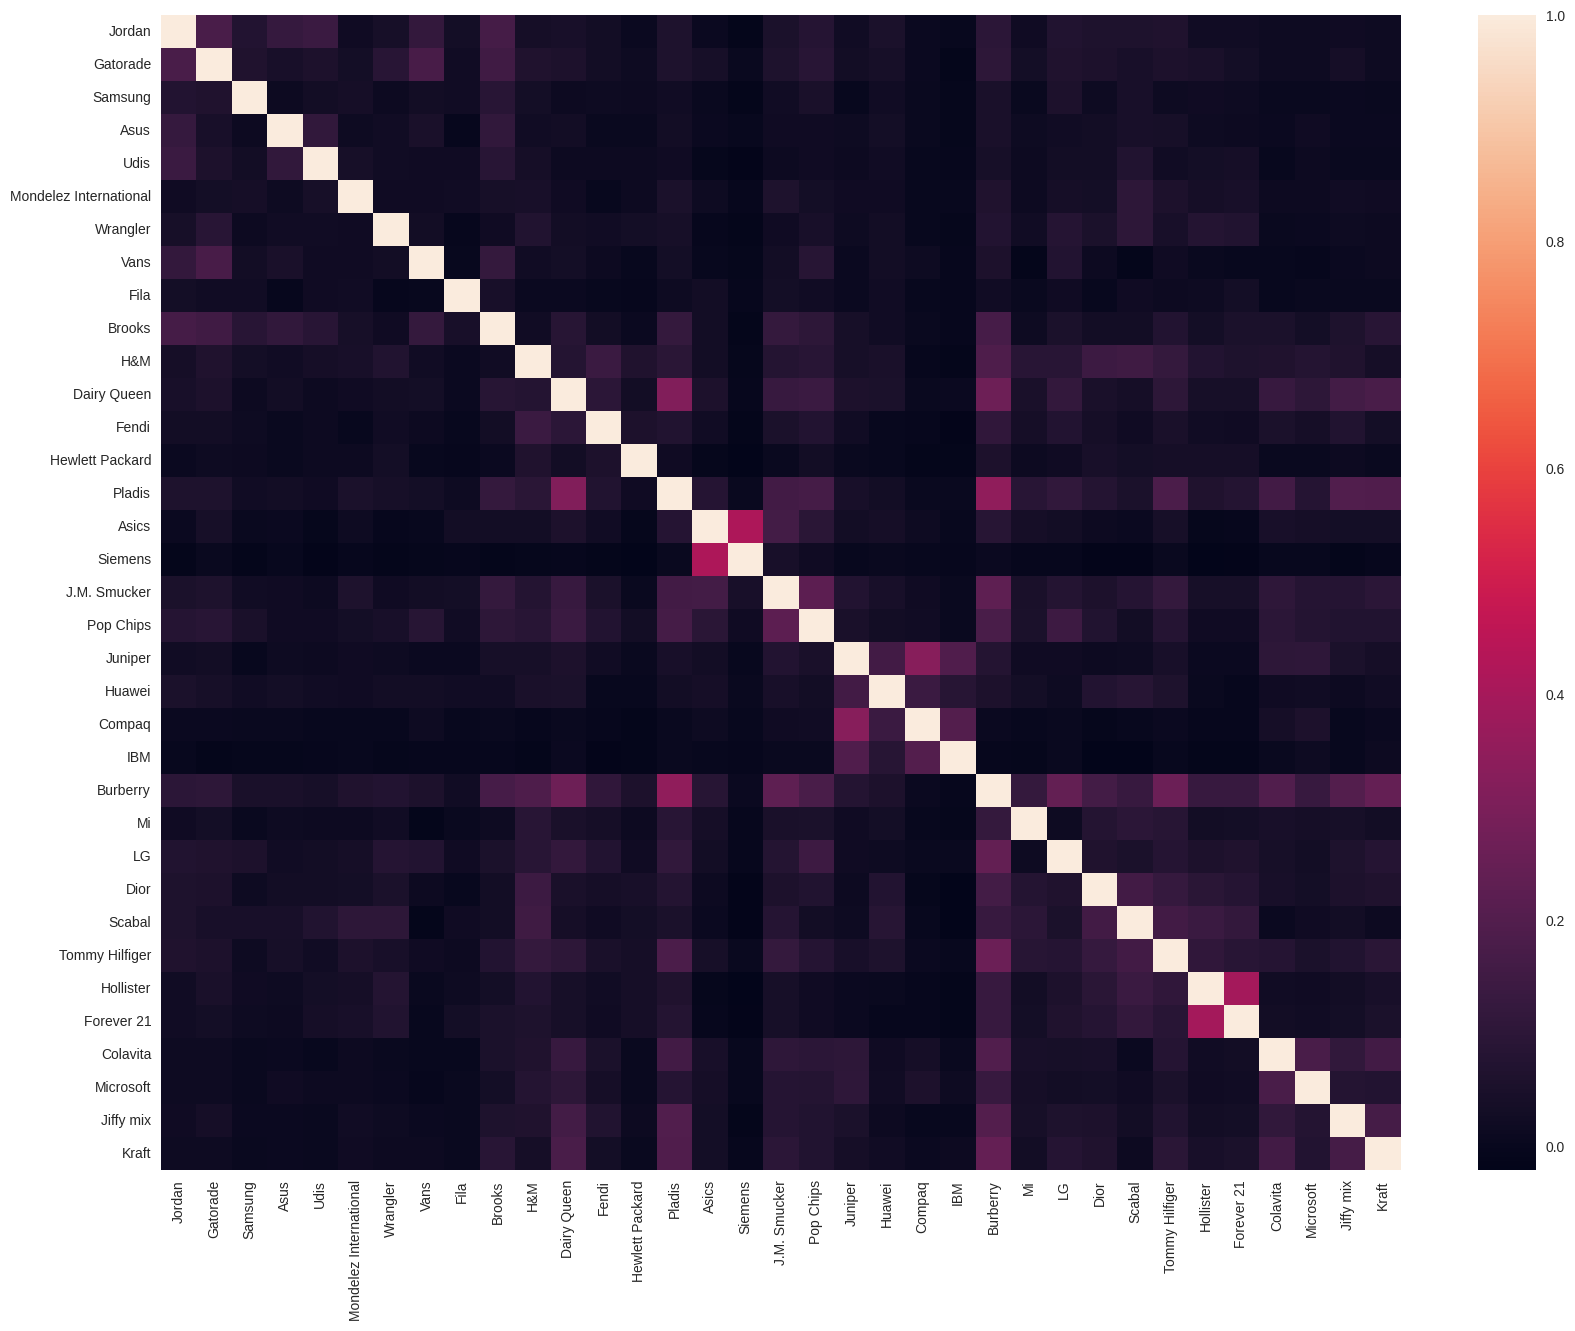

In [ ]:
#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

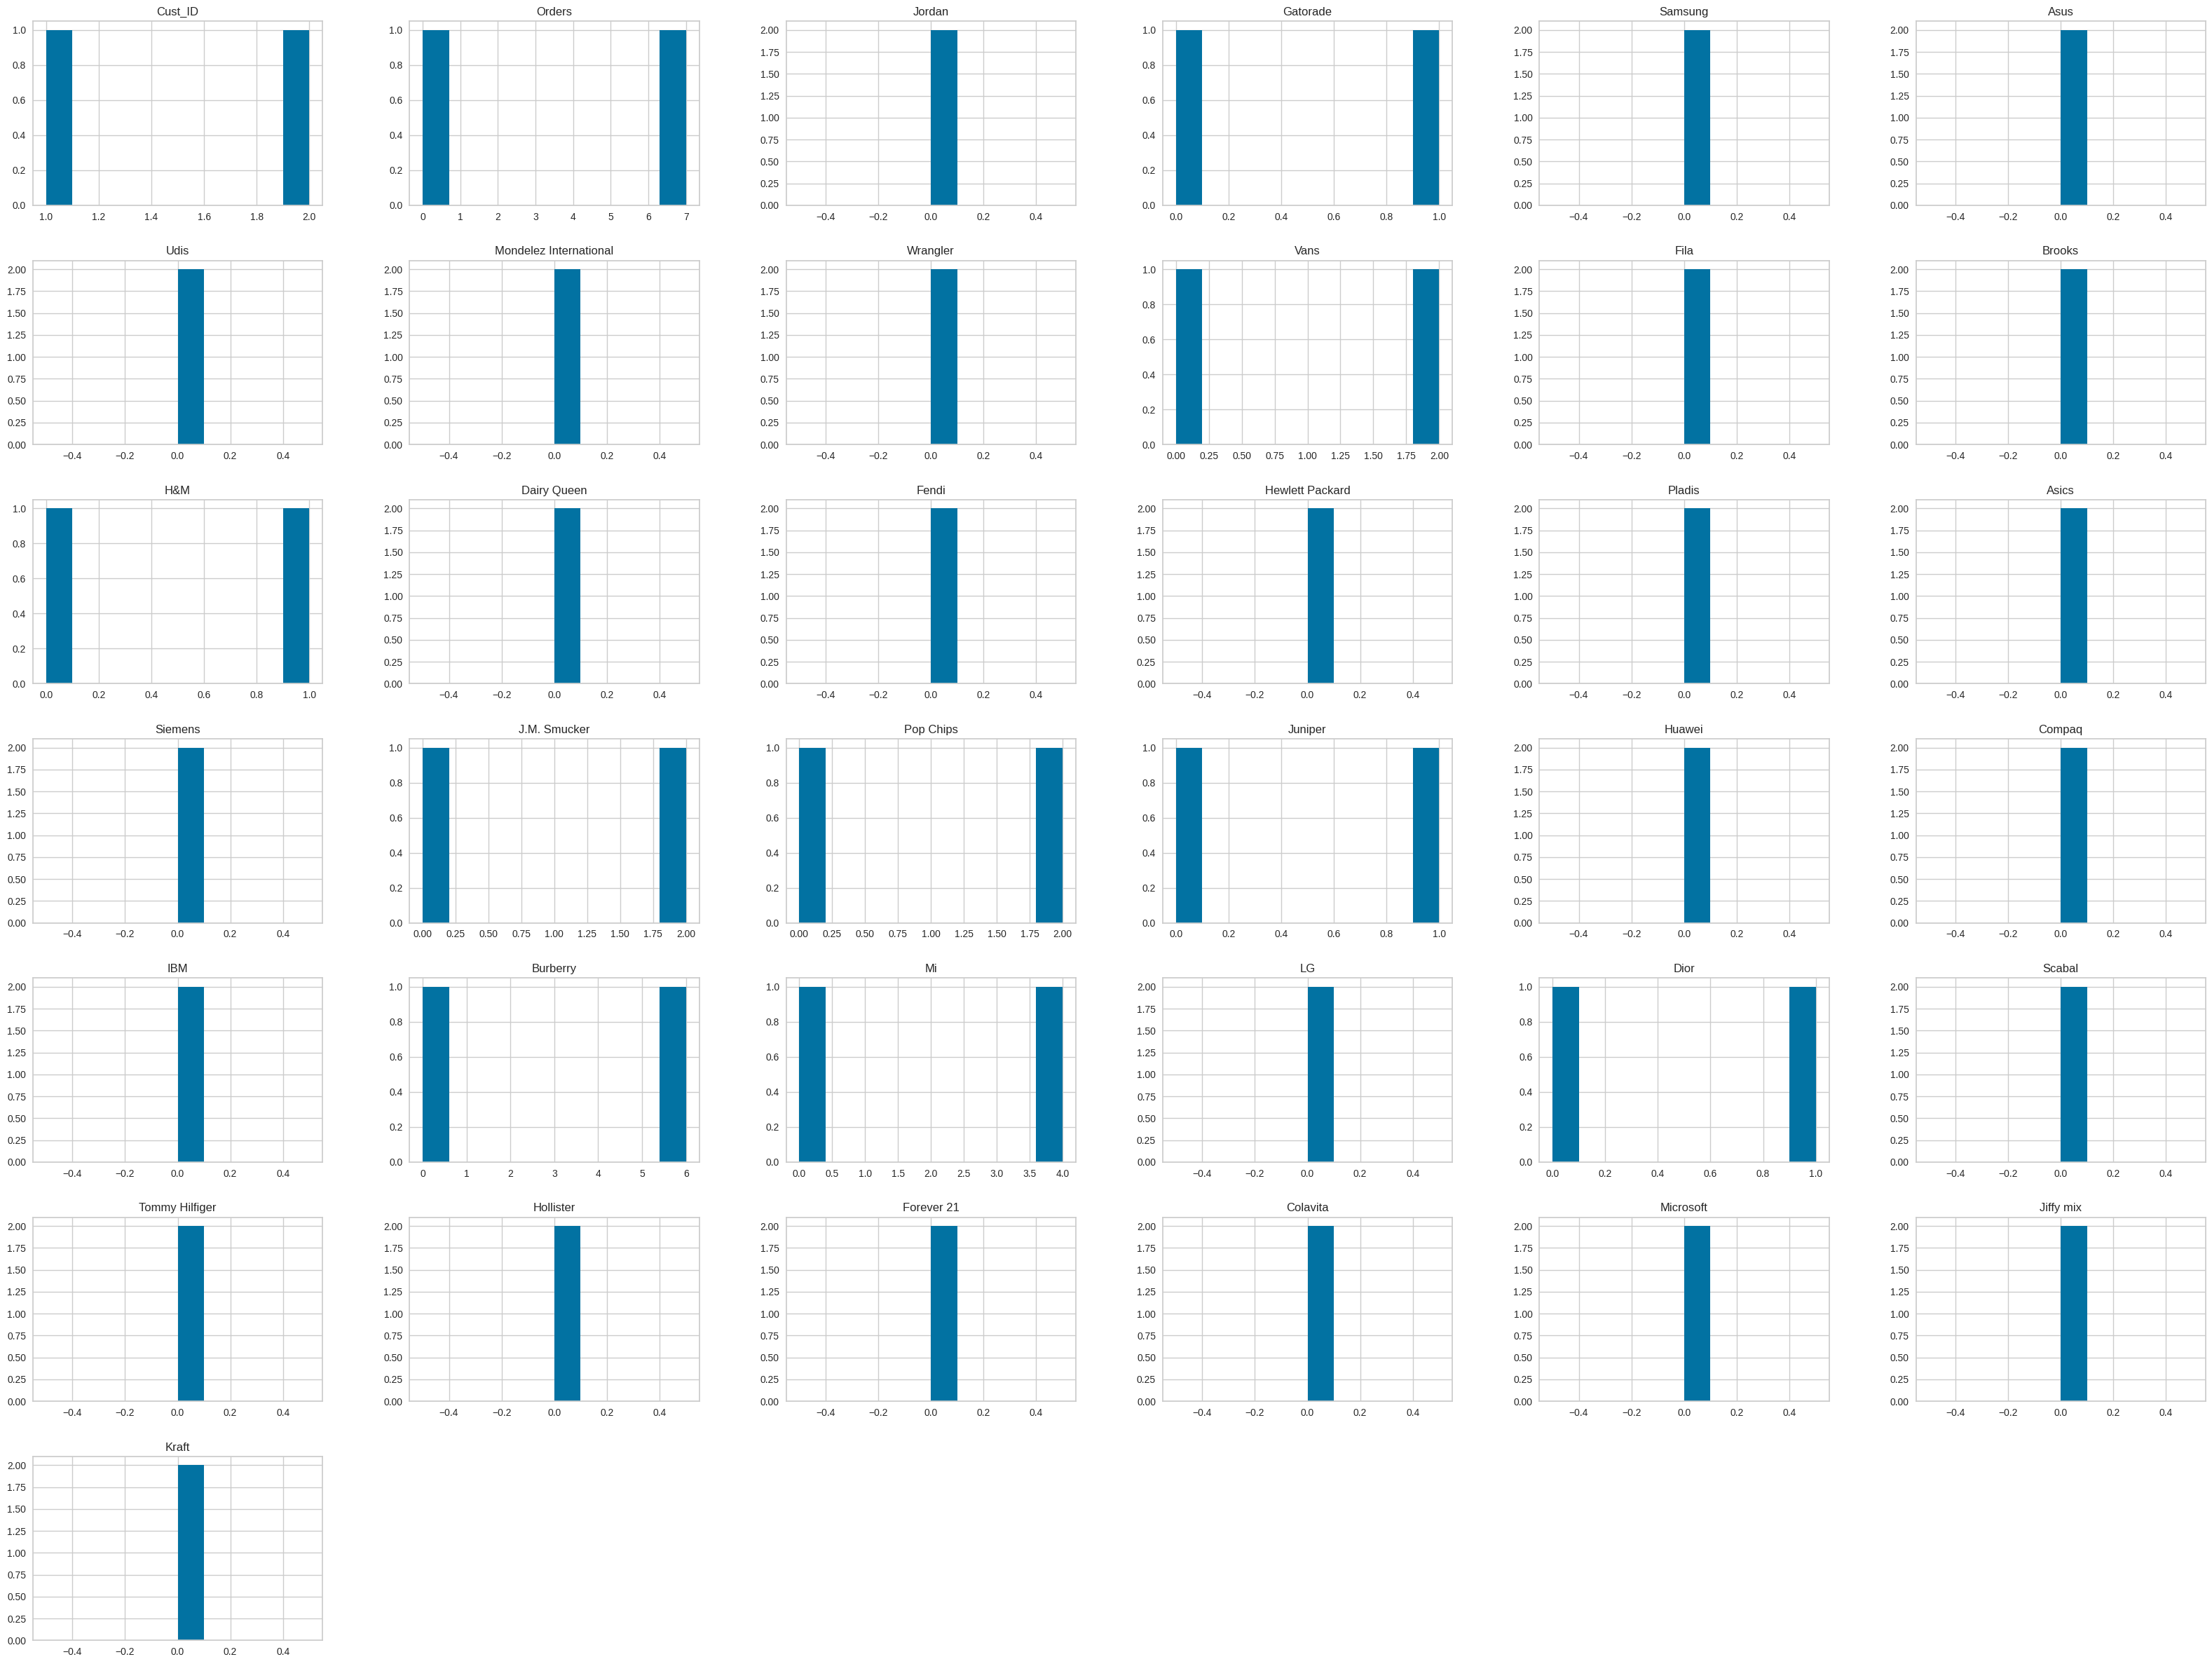

In [ ]:
df.iloc[:2,:].hist(figsize=(40,30))
plt.show()

In [ ]:
new_df=df.copy()
new_df['Total Search']=new_df.iloc[:,3:].sum(axis=1)

In [ ]:
new_df.sort_values('Total Search', ascending=False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


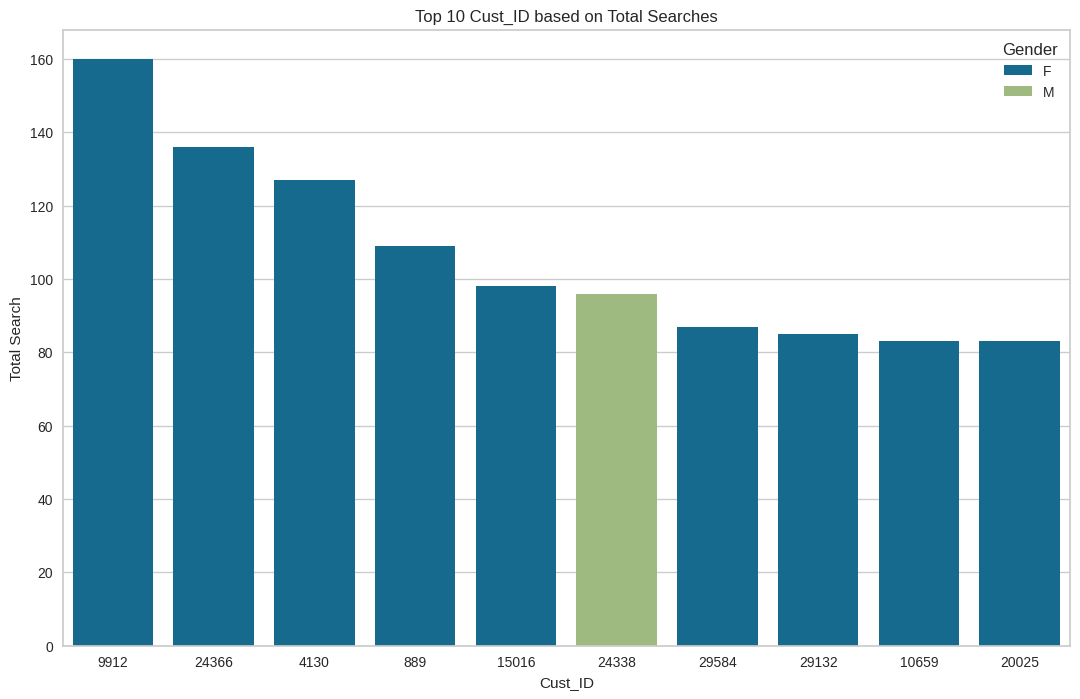

In [ ]:
plt.figure(figsize=(13,8))
plt_data=new_df.sort_values('Total Search',ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,
            x='Cust_ID',
            y='Total Search',
            hue='Gender',
            order=plt_data.sort_values('Total Search',ascending=False).Cust_ID)
plt.title("Top 10 Cust_ID based on Total Searches")
plt.show()

In [ ]:
plt.figure(figsize=(13, 8))

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

In [ ]:
plt_data = new_df.sort_values('Total Search', ascending=False)[['Cust_ID', 'Gender', 'Total Search']].head(10)

<Axes: xlabel='Cust_ID', ylabel='Total Search'>

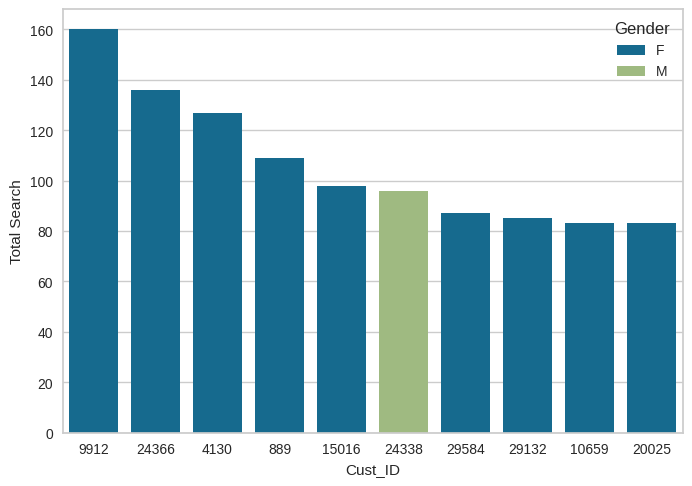

In [ ]:
sns.barplot(data=plt_data,
            x='Cust_ID',
            y='Total Search',
            hue='Gender',
            order=plt_data.sort_values('Total Search', ascending=False).Cust_ID)

Text(0.5, 1.0, 'Top 10 Cust_ID based on Total Searches')

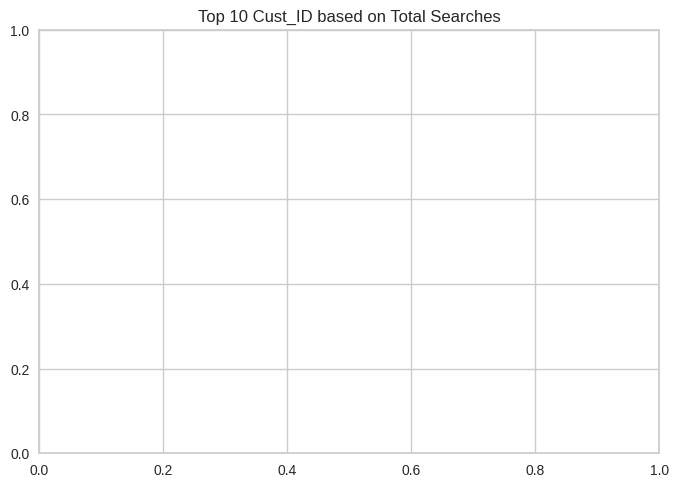

In [ ]:
plt.title("Top 10 Cust_ID based on Total Searches")

In [ ]:
plt.show()

In [ ]:
x=df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]])

In [ ]:
scale=MinMaxScaler()
features=scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
inertia=[]
for i in range(1,16):
  k_means=KMeans(n_clusters=i)
  k_means=k_means.fit(features)
  inertia.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

(Text(0.5, 0, 'No of clusters'), Text(0, 0.5, 'Inertia'))

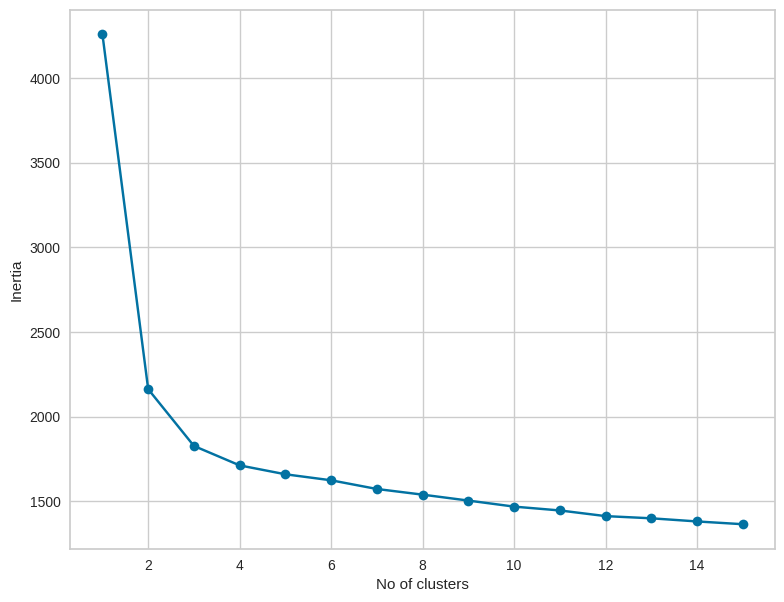

In [ ]:
#Elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16),inertia, 'bo-')
plt.xlabel('No of clusters'),plt.ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

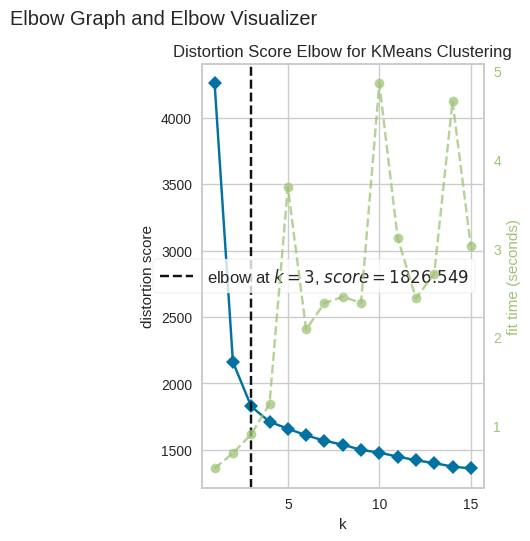

In [ ]:
plt.subplot(1,2,2)
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(features)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

<Axes: >

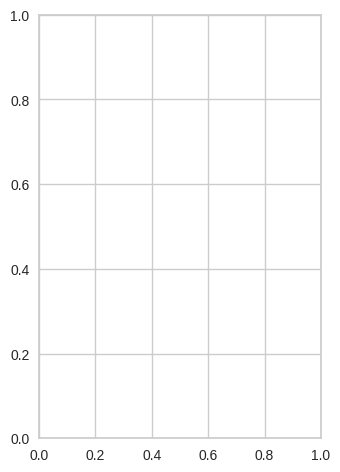

In [ ]:
plt.subplot(1, 2, 2)

In [ ]:
kmeans = KMeans()

In [ ]:
visualize = KElbowVisualizer(kmeans, k=(1, 16))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=15), k=(1, 16))

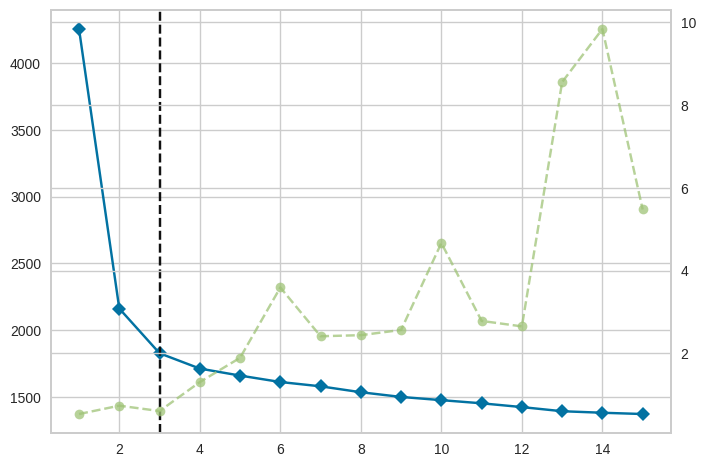

In [ ]:
visualize.fit(features)

In [ ]:
silhouette_avg=[]
for i in range(2,16):
  #initialize kmeans cluster
  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(features)
  #Silhouette score
  silhouette_avg.append(silhouette_score(features,cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

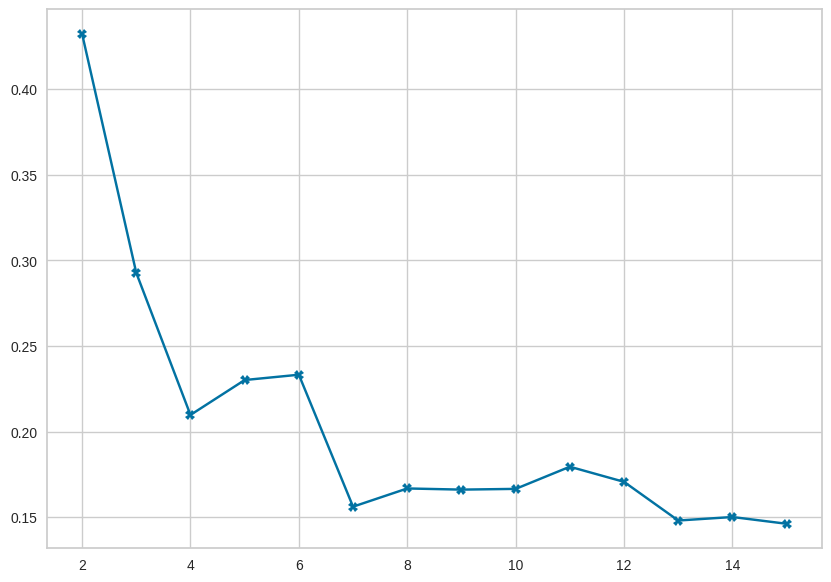

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg, 'bX-')

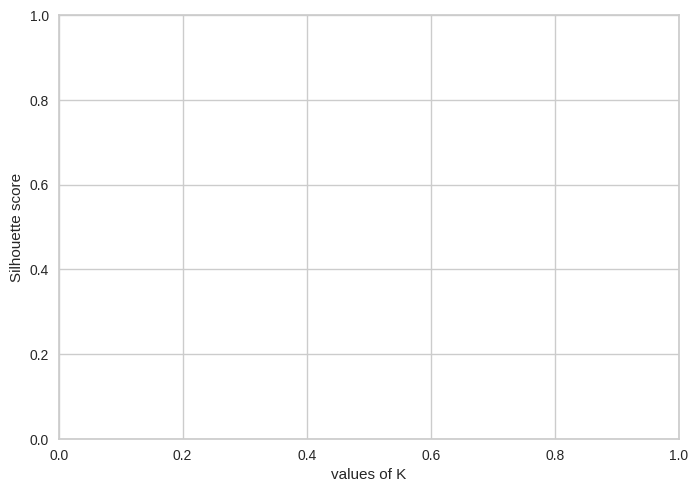

In [ ]:
plt.xlabel('values of K')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
model=KMeans(n_clusters=4)
model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
y_km=model.predict(features)
centres=model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_km=model.predict(features)
centers=model.cluster_centers_

In [ ]:
df['Cluster']=pd.DataFrame(y_km)
df.to_csv("Cluster_data", index=False)

In [ ]:
df["Cluster"].value_counts()

Cluster
1    10010
2     6921
0     6813
3     6256
Name: count, dtype: int64

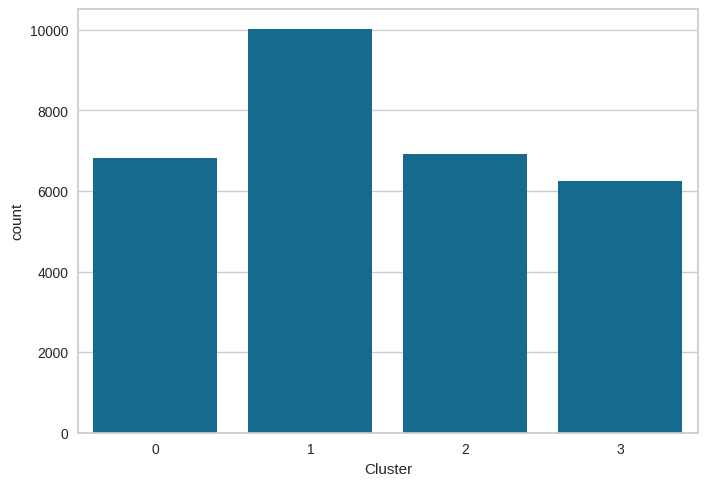

In [ ]:
sns.countplot(data=df,x='Cluster')
plt.show()

In [ ]:
c_df=pd.read_csv("Cluster_data")
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


In [ ]:
c_df['Total Search']=c_df.iloc[:,3:30].sum(axis=1)

In [ ]:
cl_0=c_df.groupby(['Cluster', 'Gender'], as_index=False).sum().query('Cluster==0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,87429363,16668,1583,1277,1341,1072,964,906,...,1706,2502,983,549,408,1128,694,550,403,34566
1,0,M,16661750,3541,416,586,259,13,52,90,...,185,69,93,35,20,196,145,113,66,5950


<function matplotlib.pyplot.show(close=None, block=None)>

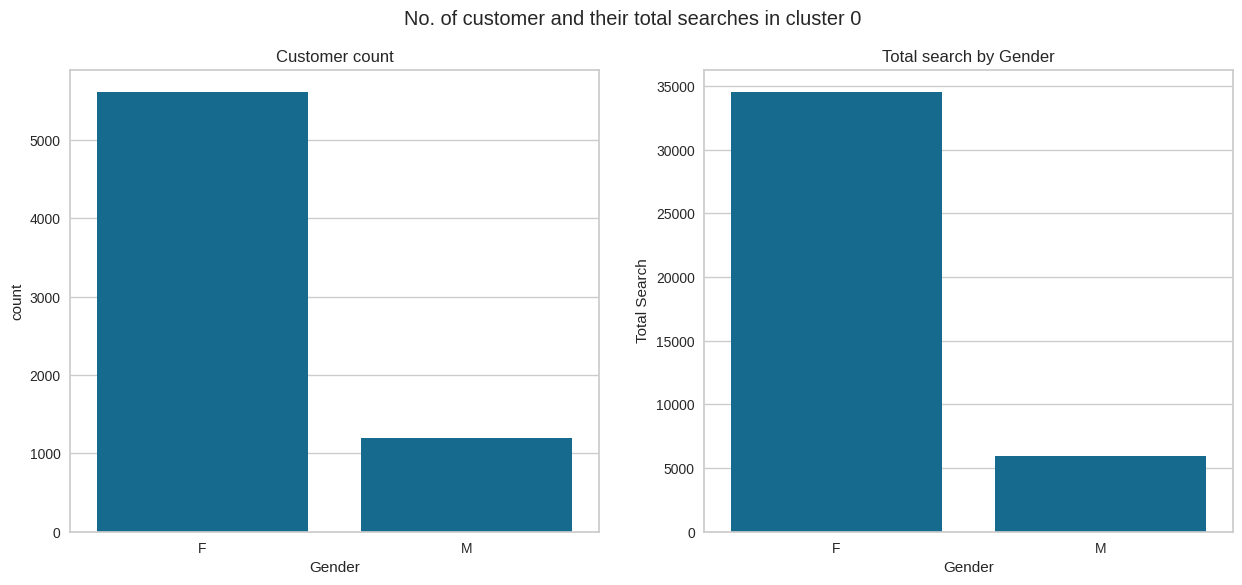

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 0'), x='Gender')
plt.title('Customer count')

plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y='Total Search')
plt.title('Total search by Gender')
plt.suptitle('No. of customer and their total searches in cluster 0')
plt.show

In [ ]:
cl_1=c_df.groupby(['Cluster', 'Gender'], as_index=False).sum().query('Cluster==1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,122813070,2275,1885,1503,1626,1454,1270,1147,...,2378,3304,1427,656,508,1555,902,668,641,45907
3,1,M,22222319,441,449,586,327,11,53,145,...,210,146,145,67,50,321,135,115,128,7379


<function matplotlib.pyplot.show(close=None, block=None)>

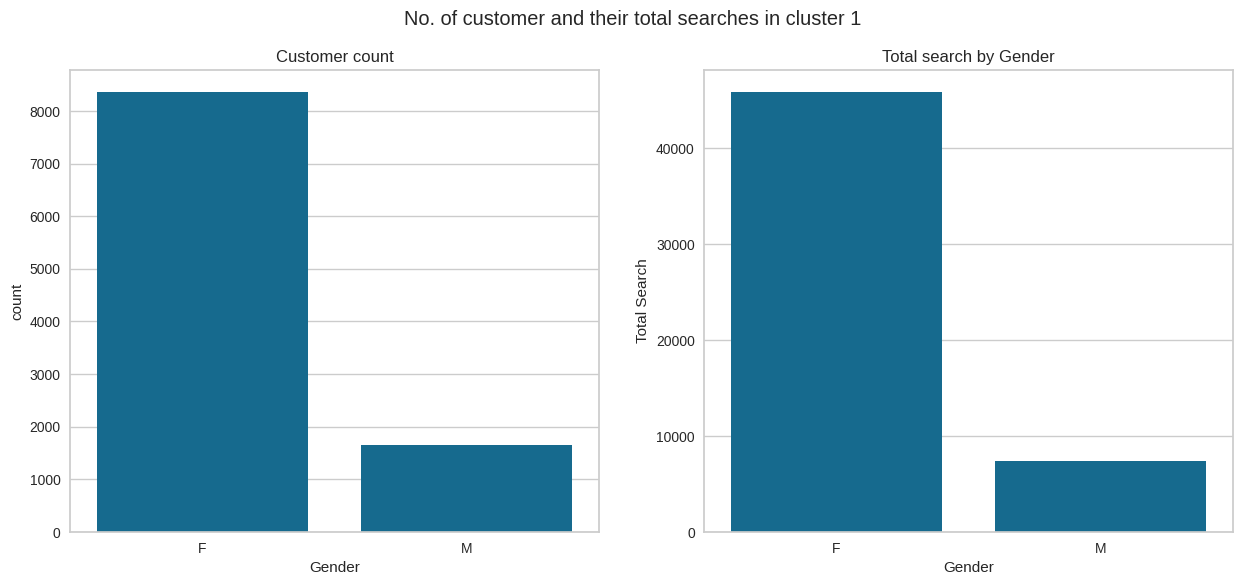

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 1'), x='Gender')
plt.title('Customer count')

plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total search by Gender')
plt.suptitle('No. of customer and their total searches in cluster 1')
plt.show

Analyze cluster 2

In [ ]:
cl_2=c_df.groupby(['Cluster', 'Gender'], as_index=False).sum().query('Cluster==2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,86845024,52600,1419,1267,1343,1158,957,881,...,1654,2579,1016,442,327,1118,718,546,425,34589
5,2,M,17872165,11836,403,668,297,8,44,107,...,224,77,122,72,37,254,141,89,79,6480


<function matplotlib.pyplot.show(close=None, block=None)>

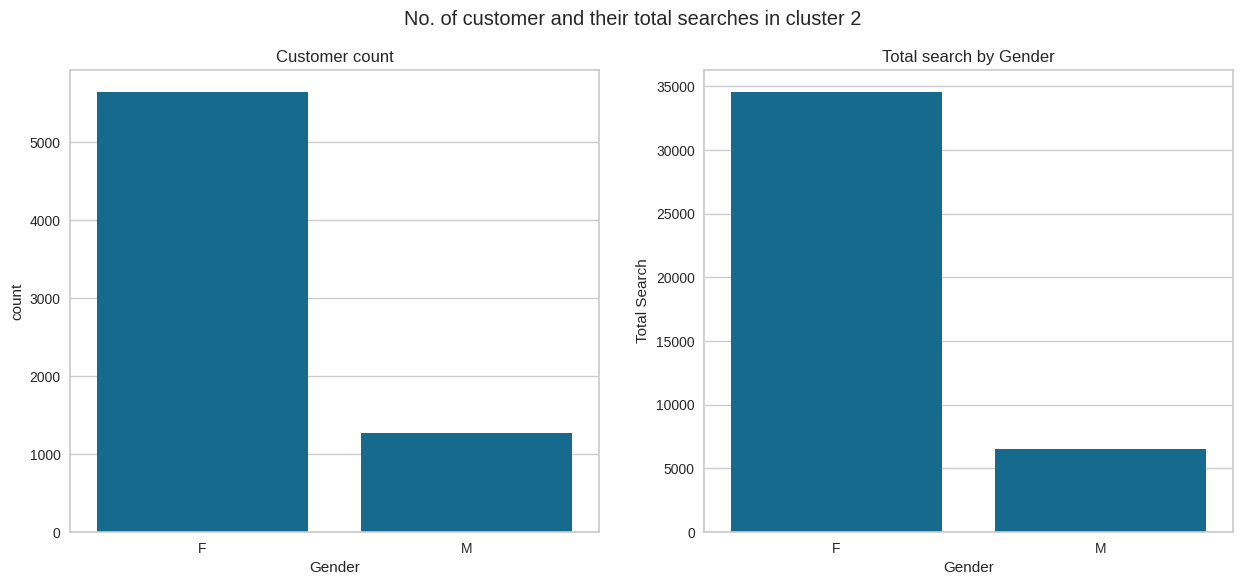

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 2'), x='Gender')
plt.title('Customer count')

plt.subplot(1,2,2)
sns.barplot(data=cl_2,x='Gender',y='Total Search')
plt.title('Total search by Gender')
plt.suptitle('No. of customer and their total searches in cluster 2')
plt.show

In [ ]:
final_df=c_df.groupby(['Cluster'], as_index=False).sum()
final_df

,Cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,104091113,FFFFFFFFFFMFFFFFMFFFFFFFMFFFFMFFFFFMFFFFFFFFFF...,20209,1999,1863,1600,1085,1016,996,...,1891,2571,1076,584,428,1324,839,663,469,40516
1,1,145035389,FFFFFFFFMFFMFFFFFFFFFFFFFFFFFFMFMMFFFFFFFFFFFF...,2716,2334,2089,1953,1465,1323,1292,...,2588,3450,1572,723,558,1876,1037,783,769,53286
2,2,104717189,FMFFFFMMFFMFMFMFFFMFMFMMFFFFFFFFFFFFFFFFFFFFFF...,64436,1822,1935,1640,1166,1001,988,...,1878,2656,1138,514,364,1372,859,635,504,41069
3,3,96171309,MMFFFFMMMFMFFFFFMFMFFFFFFFFFFFFFFMMFFFFFFMFFFF...,37733,1868,1683,1495,1124,966,917,...,1777,2425,983,509,370,1194,756,560,385,37326


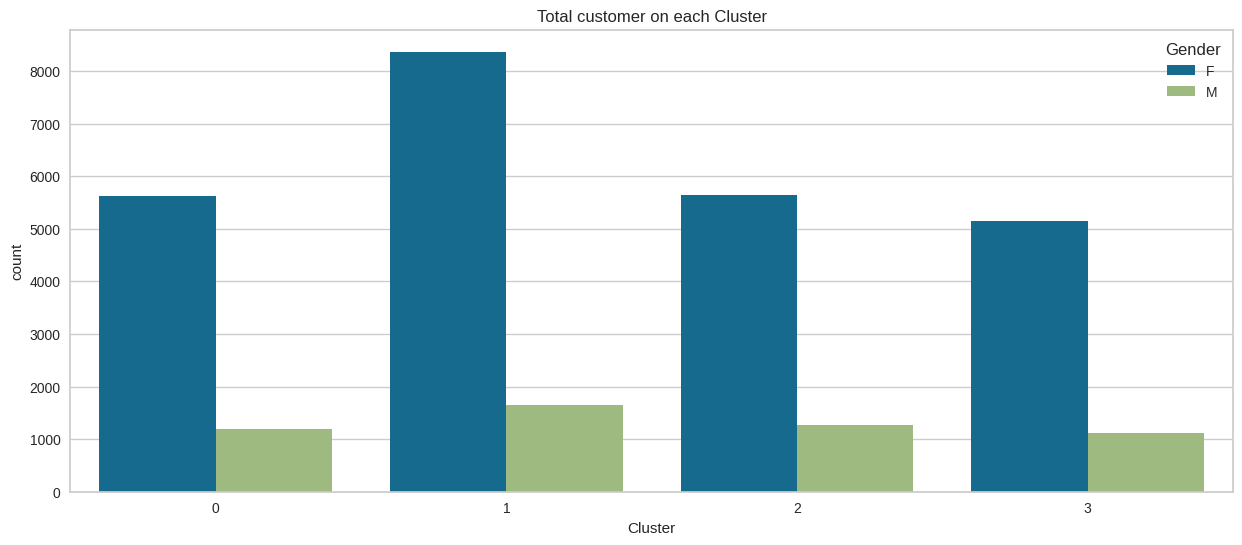

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df, x='Cluster', hue='Gender')
plt.title('Total customer on each Cluster')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

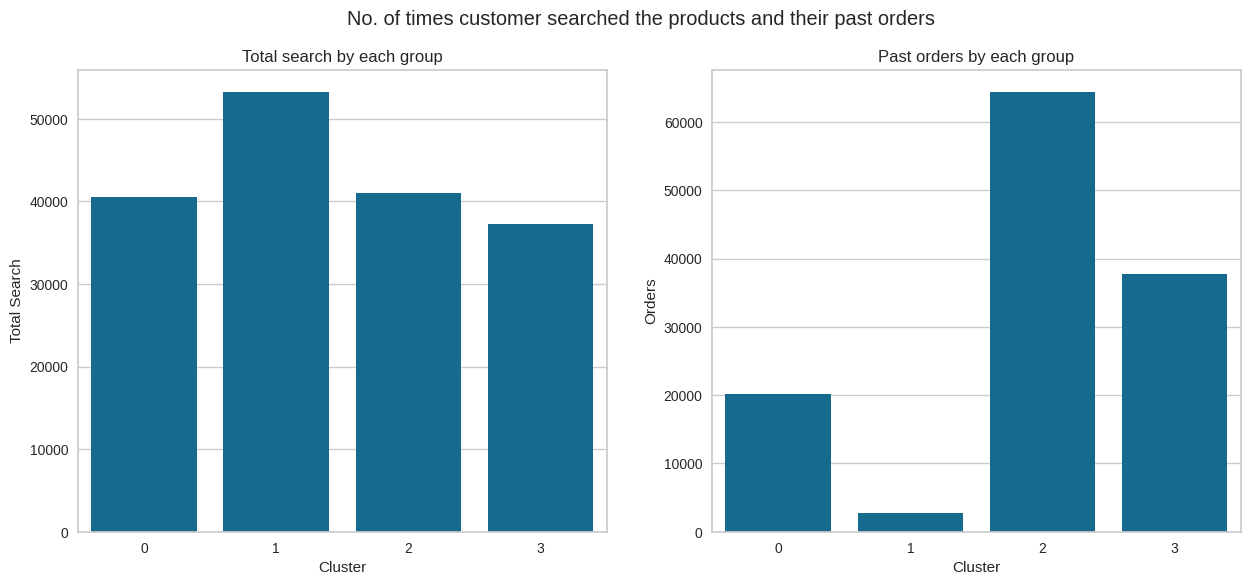

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total Search')
plt.title('Total search by each group')

plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Past orders by each group')
plt.suptitle('No. of times customer searched the products and their past orders')
plt.show

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>